In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- GENERAL ---

confidence_level = 0.95

# --- CLEANRL ---

cleanrl = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/cleanrl/shared/00.csv', './logs/cleanrl/shared/01.csv', './logs/cleanrl/shared/02.csv', './logs/cleanrl/shared/03.csv', './logs/cleanrl/shared/04.csv']]
}

#Make sure the wall time starts from 0
for df in cleanrl['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values'
cleanrl['mean_values'] = pd.concat(cleanrl['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
cleanrl['std_values'] = pd.concat(cleanrl['data_frames']).groupby(level=0).std()
cleanrl['lower_bound'] = cleanrl['mean_values'] - 2 * cleanrl['std_values']
cleanrl['upper_bound'] = cleanrl['mean_values'] + 2 * cleanrl['std_values']

# calculate the standard error
cleanrl['std_error'] = cleanrl['std_values'] / np.sqrt(len(cleanrl['std_values']))

# --- RLLIB ---

rllib = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/rllib/shared/00.csv', './logs/rllib/shared/01.csv', './logs/rllib/shared/02.csv', './logs/rllib/shared/03.csv', './logs/rllib/shared/04.csv']]
}

#Make sure the wall time starts from 0
for df in rllib['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values
rllib['mean_values'] = pd.concat(rllib['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
rllib['std_values'] = pd.concat(rllib['data_frames']).groupby(level=0).std()
rllib['lower_bound'] = rllib['mean_values'] - 2 * rllib['std_values']
rllib['upper_bound'] = rllib['mean_values'] + 2 * rllib['std_values']

# calculate the standard error
rllib['std_error'] = rllib['std_values'] / np.sqrt(len(rllib['std_values']))

# --- SB3 ---

sb3 = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/sb3/shared/00.csv', './logs/sb3/shared/01.csv', './logs/sb3/shared/02.csv', './logs/sb3/shared/03.csv', './logs/sb3/shared/04.csv']]
}

#Make sure the wall time starts from 0
for df in sb3['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values
sb3['mean_values'] = pd.concat(sb3['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
sb3['std_values'] = pd.concat(sb3['data_frames']).groupby(level=0).std()
sb3['lower_bound'] = sb3['mean_values'] - 2 * sb3['std_values']
sb3['upper_bound'] = sb3['mean_values'] + 2 * sb3['std_values']

# calculate the standard error
sb3['std_error'] = sb3['std_values'] / np.sqrt(len(sb3['std_values']))

# --- SF ---

sf = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/sf/shared/00.csv', './logs/sf/shared/01.csv', './logs/sf/shared/02.csv', './logs/sf/shared/03.csv', './logs/sf/shared/04.csv']]
}

#Make sure the wall time starts from 0
for df in sf['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values
sf['mean_values'] = pd.concat(sf['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
sf['std_values'] = pd.concat(sf['data_frames']).groupby(level=0).std()
sf['lower_bound'] = sf['mean_values'] - 2 * sf['std_values']
sf['upper_bound'] = sf['mean_values'] + 2 * sf['std_values']

# calculate the standard error
sf['std_error'] = sf['std_values'] / np.sqrt(len(sf['std_values']))

# --- UNITY ---

unity = {
    'data_frames': [pd.read_csv(file) for file in ['./logs/unity/shared/00.csv', './logs/unity/shared/01.csv', './logs/unity/shared/02.csv', './logs/unity/shared/03.csv', './logs/unity/shared/04.csv']]
}

#Make sure the wall time starts from 0
for df in unity['data_frames']:
    df['Wall time'] -= df['Wall time'][0]

# Calculate the mean values
unity['mean_values'] = pd.concat(unity['data_frames']).groupby(level=0).mean()

# Calculate the upper and lower bounds for the confidence interval
unity['std_values'] = pd.concat(unity['data_frames']).groupby(level=0).std()
unity['lower_bound'] = unity['mean_values'] - 2 * unity['std_values']
unity['upper_bound'] = unity['mean_values'] + 2 * unity['std_values']

# calculate the standard error
unity['std_error'] = unity['std_values'] / np.sqrt(len(unity['std_values']))


In [5]:
# Generate Tables

print("---After around 80 seconds of training---\n")

duration = 80
cleanrl_index = (np.abs(np.array(cleanrl['mean_values']['Wall time']) - duration)).argmin()
rllib_index = (np.abs(np.array(rllib['mean_values']['Wall time']) - duration)).argmin()
sb3_index = (np.abs(np.array(sb3['mean_values']['Wall time']) - duration)).argmin()
sf_index = (np.abs(np.array(sf['mean_values']['Wall time']) - duration)).argmin()
unity_index = (np.abs(np.array(unity['mean_values']['Wall time']) - duration)).argmin()

df = pd.DataFrame({
    '\\textbf{Godot[CleanRL]}': [f"{cleanrl['mean_values']['Value'].iloc[cleanrl_index]:.0f} ({cleanrl['lower_bound']['Value'].iloc[cleanrl_index]:.0f}, {cleanrl['upper_bound']['Value'].iloc[cleanrl_index]:.0f})"],
    '\\textbf{Godot[RLlib]}': [f"{rllib['mean_values']['Value'].iloc[rllib_index]:.0f} ({rllib['lower_bound']['Value'].iloc[rllib_index]:.0f}, {rllib['upper_bound']['Value'].iloc[rllib_index]:.0f})"],
    '\\textbf{Godot[SB3]}': [f"{sb3['mean_values']['Value'].iloc[sb3_index]:.0f} ({sb3['lower_bound']['Value'].iloc[sb3_index]:.0f}, {sb3['upper_bound']['Value'].iloc[sb3_index]:.0f})"],
    '\\textbf{Godot[SF]}': [f"{sf['mean_values']['Value'].iloc[sf_index]:.0f} ({sf['lower_bound']['Value'].iloc[sf_index]:.0f}, {sf['upper_bound']['Value'].iloc[sf_index]:.0f})"],
    '\\textbf{Unity ML}': [f"{unity['mean_values']['Value'].iloc[unity_index]:.0f} ({unity['lower_bound']['Value'].iloc[unity_index]:.0f}, {unity['upper_bound']['Value'].iloc[unity_index]:.0f})"],
})
df.head()

# Export the DataFrame as a LaTeX table
latex_table = df.to_latex(index = False, float_format="%.0f", column_format="|c|c|c|c|c|c|", bold_rows=True)
latex_table = latex_table.replace('\\toprule', '\hline \\rowcolor{gray!75}')
latex_table = latex_table.replace('\\midrule', '\hline')
latex_table = latex_table.replace('\\bottomrule', '\hline')

# Print the LaTeX table
print(latex_table)

print("---After around 22 minutes of training---\n")

cleanrl_index = cleanrl['lower_bound']['Value'].last_valid_index()
rllib_index = rllib['lower_bound']['Value'].last_valid_index()
sb3_index = sb3['lower_bound']['Value'].last_valid_index()
sf_index = sf['lower_bound']['Value'].last_valid_index()
unity_index = unity['lower_bound']['Value'].last_valid_index()

df = pd.DataFrame({
    '\\textbf{Godot[CleanRL]}': [f"{cleanrl['mean_values']['Value'].iloc[cleanrl_index]:.0f} ({cleanrl['lower_bound']['Value'].iloc[cleanrl_index]:.0f}, {cleanrl['upper_bound']['Value'].iloc[cleanrl_index]:.0f})"],
    '\\textbf{Godot[RLlib]}': [f"{rllib['mean_values']['Value'].iloc[rllib_index]:.0f} ({rllib['lower_bound']['Value'].iloc[rllib_index]:.0f}, {rllib['upper_bound']['Value'].iloc[rllib_index]:.0f})"],
    '\\textbf{Godot[SB3]}': [f"{sb3['mean_values']['Value'].iloc[sb3_index]:.0f} ({sb3['lower_bound']['Value'].iloc[sb3_index]:.0f}, {sb3['upper_bound']['Value'].iloc[sb3_index]:.0f})"],
    '\\textbf{Godot[SF]}': [f"{sf['mean_values']['Value'].iloc[sf_index]:.0f} ({sf['lower_bound']['Value'].iloc[sf_index]:.0f}, {sf['upper_bound']['Value'].iloc[sf_index]:.0f})"],
    '\\textbf{Unity ML}': [f"{unity['mean_values']['Value'].iloc[unity_index]:.0f} ({unity['lower_bound']['Value'].iloc[unity_index]:.0f}, {unity['upper_bound']['Value'].iloc[unity_index]:.0f})"],
})
df.head()

# Export the DataFrame as a LaTeX table
latex_table = df.to_latex(index = False, float_format="%.0f", column_format="|c|c|c|c|c|c|", bold_rows=True)
latex_table = latex_table.replace('\\toprule', '\hline \\rowcolor{gray!75}')
latex_table = latex_table.replace('\\midrule', '\hline')
latex_table = latex_table.replace('\\bottomrule', '\hline')

# Print the LaTeX table
print(latex_table)

print("---After around 1 million time-steps---\n")

time_steps = 1.0e6
cleanrl_index = (np.abs(np.array(cleanrl['mean_values']['Step']) - time_steps)).argmin()
rllib_index = (np.abs(np.array(rllib['mean_values']['Step']) - time_steps)).argmin()
sb3_index = (np.abs(np.array(sb3['mean_values']['Step']) - time_steps)).argmin()
sf_index = (np.abs(np.array(sf['mean_values']['Step']) - time_steps)).argmin()
unity_index = (np.abs(np.array(unity['mean_values']['Step']) - time_steps)).argmin()

df = pd.DataFrame({
    '\\textbf{Godot[CleanRL]}': [f"{cleanrl['mean_values']['Value'].iloc[cleanrl_index]:.0f} ({cleanrl['lower_bound']['Value'].iloc[cleanrl_index]:.0f}, {cleanrl['upper_bound']['Value'].iloc[cleanrl_index]:.0f})"],
    '\\textbf{Godot[RLlib]}': [f"{rllib['mean_values']['Value'].iloc[rllib_index]:.0f} ({rllib['lower_bound']['Value'].iloc[rllib_index]:.0f}, {rllib['upper_bound']['Value'].iloc[rllib_index]:.0f})"],
    '\\textbf{Godot[SB3]}': [f"{sb3['mean_values']['Value'].iloc[sb3_index]:.0f} ({sb3['lower_bound']['Value'].iloc[sb3_index]:.0f}, {sb3['upper_bound']['Value'].iloc[sb3_index]:.0f})"],
    '\\textbf{Godot[SF]}': [f"{sf['mean_values']['Value'].iloc[sf_index]:.0f} ({sf['lower_bound']['Value'].iloc[sf_index]:.0f}, {sf['upper_bound']['Value'].iloc[sf_index]:.0f})"],
    '\\textbf{Unity ML}': [f"{unity['mean_values']['Value'].iloc[unity_index]:.0f} ({unity['lower_bound']['Value'].iloc[unity_index]:.0f}, {unity['upper_bound']['Value'].iloc[unity_index]:.0f})"],
})
df.head()

# Export the DataFrame as a LaTeX table
latex_table = df.to_latex(index = False, float_format="%.0f", column_format="|c|c|c|c|c|c|", bold_rows=True)
latex_table = latex_table.replace('\\toprule', '\hline \\rowcolor{gray!75}')
latex_table = latex_table.replace('\\midrule', '\hline')
latex_table = latex_table.replace('\\bottomrule', '\hline')

# Print the LaTeX table
print(latex_table)

---After around 80 seconds of training---

\begin{tabular}{|c|c|c|c|c|c|}
\hline \rowcolor{gray!75}
\textbf{Godot[CleanRL]} & \textbf{Godot[RLlib]} & \textbf{Godot[SB3]} & \textbf{Godot[SF]} & \textbf{Unity ML} \\
\hline
64 (5, 122) & 5 (2, 8) & 54 (33, 76) & 68 (30, 106) & 17 (-2, 37) \\
\hline
\end{tabular}

---After around 22 minutes of training---

\begin{tabular}{|c|c|c|c|c|c|}
\hline \rowcolor{gray!75}
\textbf{Godot[CleanRL]} & \textbf{Godot[RLlib]} & \textbf{Godot[SB3]} & \textbf{Godot[SF]} & \textbf{Unity ML} \\
\hline
3353 (1765, 4941) & 1163 (308, 2017) & 6007 (4561, 7453) & 3935 (1675, 6195) & 15488 (14289, 16687) \\
\hline
\end{tabular}

---After around 1 million time-steps---

\begin{tabular}{|c|c|c|c|c|c|}
\hline \rowcolor{gray!75}
\textbf{Godot[CleanRL]} & \textbf{Godot[RLlib]} & \textbf{Godot[SB3]} & \textbf{Godot[SF]} & \textbf{Unity ML} \\
\hline
353 (66, 641) & 17 (5, 30) & 429 (282, 575) & 333 (235, 432) & 2301 (-1196, 5799) \\
\hline
\end{tabular}



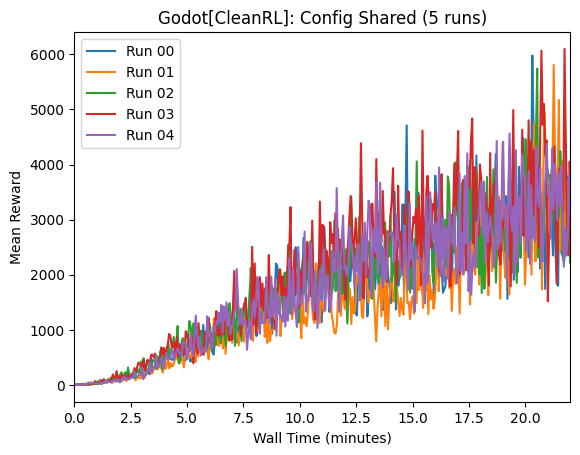

In [3]:
plt.plot(cleanrl['data_frames'][0]['Wall time'] / 60, cleanrl['data_frames'][0]['Value'], label="Run 00")
plt.plot(cleanrl['data_frames'][1]['Wall time'] / 60, cleanrl['data_frames'][1]['Value'], label="Run 01")
plt.plot(cleanrl['data_frames'][2]['Wall time'] / 60, cleanrl['data_frames'][2]['Value'], label="Run 02")
plt.plot(cleanrl['data_frames'][3]['Wall time'] / 60, cleanrl['data_frames'][3]['Value'], label="Run 03")
plt.plot(cleanrl['data_frames'][4]['Wall time'] / 60, cleanrl['data_frames'][4]['Value'], label="Run 04")
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Godot[CleanRL]: Config Shared (5 runs)")
plt.legend(loc="upper left")
plt.show()

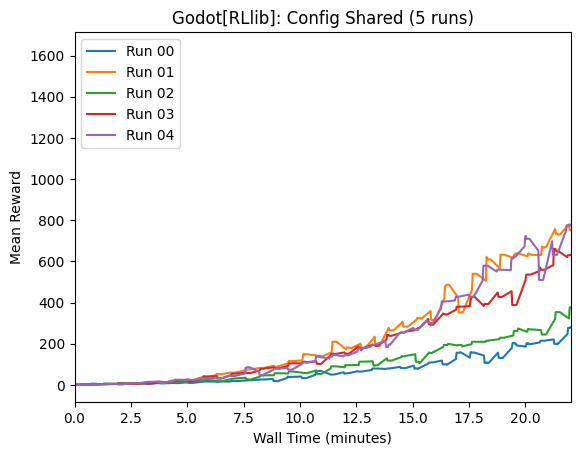

In [3]:
plt.plot(rllib['data_frames'][0]['Wall time'] / 60, rllib['data_frames'][0]['Value'], label="Run 00")
plt.plot(rllib['data_frames'][1]['Wall time'] / 60, rllib['data_frames'][1]['Value'], label="Run 01")
plt.plot(rllib['data_frames'][2]['Wall time'] / 60, rllib['data_frames'][2]['Value'], label="Run 02")
plt.plot(rllib['data_frames'][3]['Wall time'] / 60, rllib['data_frames'][3]['Value'], label="Run 03")
plt.plot(rllib['data_frames'][4]['Wall time'] / 60, rllib['data_frames'][4]['Value'], label="Run 04")
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Godot[RLlib]: Config Shared (5 runs)")
plt.legend(loc="upper left")
plt.show()

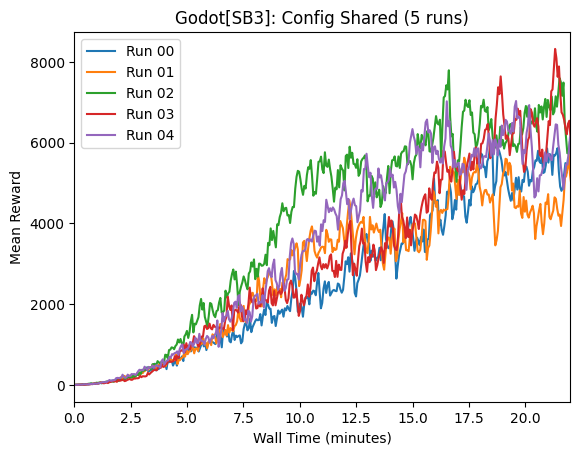

In [4]:
plt.plot(sb3['data_frames'][0]['Wall time'] / 60, sb3['data_frames'][0]['Value'], label="Run 00")
plt.plot(sb3['data_frames'][1]['Wall time'] / 60, sb3['data_frames'][1]['Value'], label="Run 01")
plt.plot(sb3['data_frames'][2]['Wall time'] / 60, sb3['data_frames'][2]['Value'], label="Run 02")
plt.plot(sb3['data_frames'][3]['Wall time'] / 60, sb3['data_frames'][3]['Value'], label="Run 03")
plt.plot(sb3['data_frames'][4]['Wall time'] / 60, sb3['data_frames'][4]['Value'], label="Run 04")
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Godot[SB3]: Config Shared (5 runs)")
plt.legend(loc="upper left")
plt.show()

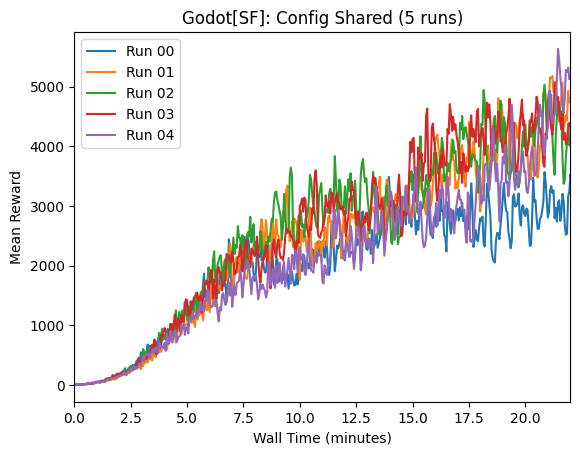

In [5]:
plt.plot(sf['data_frames'][0]['Wall time'] / 60, sf['data_frames'][0]['Value'], label="Run 00")
plt.plot(sf['data_frames'][1]['Wall time'] / 60, sf['data_frames'][1]['Value'], label="Run 01")
plt.plot(sf['data_frames'][2]['Wall time'] / 60, sf['data_frames'][2]['Value'], label="Run 02")
plt.plot(sf['data_frames'][3]['Wall time'] / 60, sf['data_frames'][3]['Value'], label="Run 03")
plt.plot(sf['data_frames'][4]['Wall time'] / 60, sf['data_frames'][4]['Value'], label="Run 04")
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Godot[SF]: Config Shared (5 runs)")
plt.legend(loc="upper left")
plt.show()

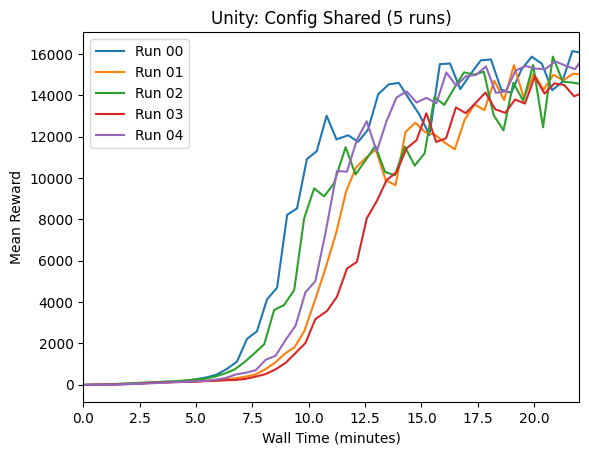

In [6]:
plt.plot(unity['data_frames'][0]['Wall time'] / 60, unity['data_frames'][0]['Value'], label="Run 00")
plt.plot(unity['data_frames'][1]['Wall time'] / 60, unity['data_frames'][1]['Value'], label="Run 01")
plt.plot(unity['data_frames'][2]['Wall time'] / 60, unity['data_frames'][2]['Value'], label="Run 02")
plt.plot(unity['data_frames'][3]['Wall time'] / 60, unity['data_frames'][3]['Value'], label="Run 03")
plt.plot(unity['data_frames'][4]['Wall time'] / 60, unity['data_frames'][4]['Value'], label="Run 04")
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Unity: Config Shared (5 runs)")
plt.legend(loc="upper left")
plt.show()

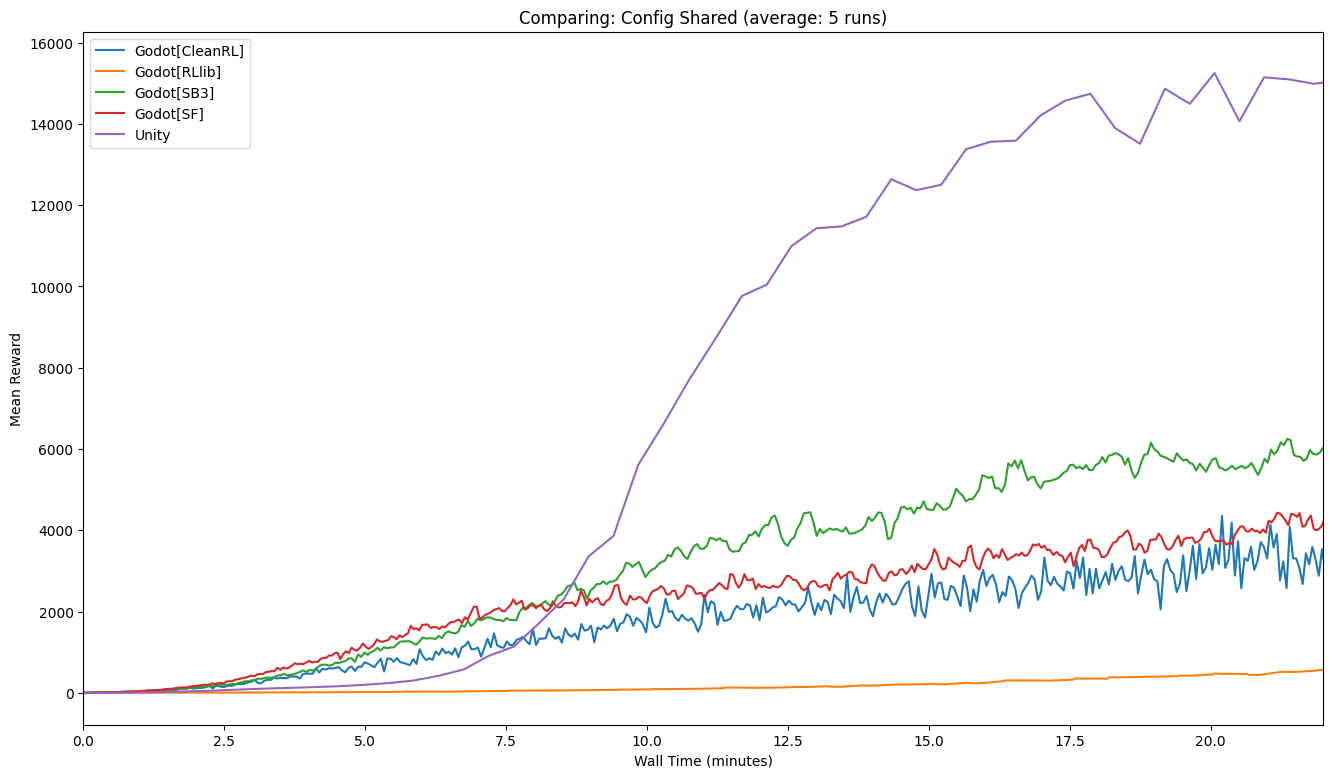

In [15]:
plt.figure(figsize=(16, 9))

# Plot the mean values
plt.plot(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'], label='Godot[CleanRL]')
plt.plot(rllib['mean_values']['Wall time'] / 60, rllib['mean_values']['Value'], label='Godot[RLlib]')
plt.plot(sb3['mean_values']['Wall time'] / 60, sb3['mean_values']['Value'], label='Godot[SB3]')
plt.plot(sf['mean_values']['Wall time'] / 60, sf['mean_values']['Value'], label='Godot[SF]')
plt.plot(unity['mean_values']['Wall time'] / 60, unity['mean_values']['Value'], label='Unity')

# Add labels and title
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Comparing: Config Shared (average: 5 runs)")
plt.legend(loc="upper left")

# Show the plot
plt.show()

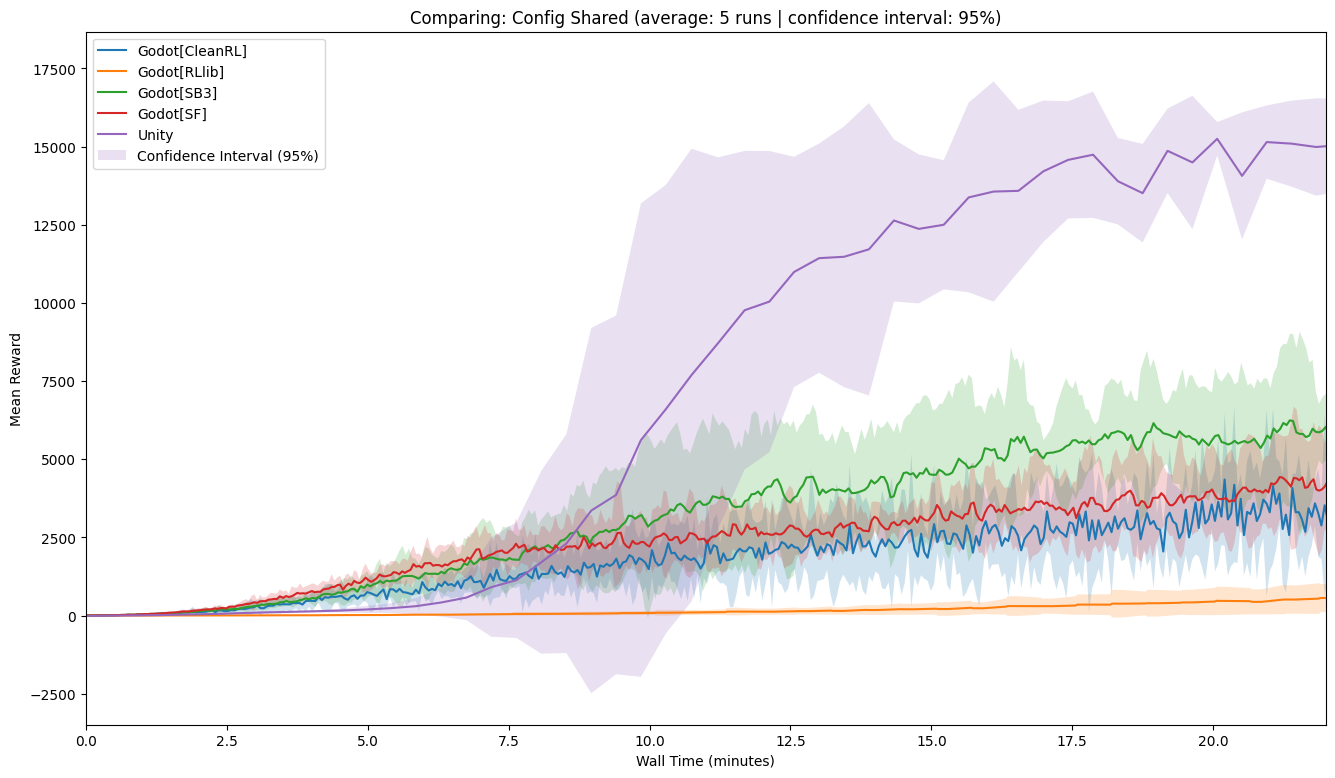

In [3]:
# Create a plot
plt.figure(figsize=(16, 9))

# Plot the mean values with confidence intervals
plt.plot(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'], label='Godot[CleanRL]')
plt.fill_between(cleanrl['mean_values']['Wall time'] / 60, cleanrl['lower_bound']['Value'], cleanrl['upper_bound']['Value'], alpha=0.2)
plt.plot(rllib['mean_values']['Wall time'] / 60, rllib['mean_values']['Value'], label='Godot[RLlib]')
plt.fill_between(rllib['mean_values']['Wall time'] / 60, rllib['lower_bound']['Value'], rllib['upper_bound']['Value'], alpha=0.2)
plt.plot(sb3['mean_values']['Wall time'] / 60, sb3['mean_values']['Value'], label='Godot[SB3]')
plt.fill_between(sb3['mean_values']['Wall time'] / 60, sb3['lower_bound']['Value'], sb3['upper_bound']['Value'], alpha=0.2)
plt.plot(sf['mean_values']['Wall time'] / 60, sf['mean_values']['Value'], label='Godot[SF]')
plt.fill_between(sf['mean_values']['Wall time'] / 60, sf['lower_bound']['Value'], sf['upper_bound']['Value'], alpha=0.2)
plt.plot(unity['mean_values']['Wall time'] / 60, unity['mean_values']['Value'], label='Unity')
plt.fill_between(unity['mean_values']['Wall time'] / 60, unity['lower_bound']['Value'], unity['upper_bound']['Value'], alpha=0.2, label='Confidence Interval (95%)')

# Add labels and title
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Comparing: Config Shared (average: 5 runs | confidence interval: 95%)")
plt.legend(loc="upper left")

# Show the plot
plt.show()


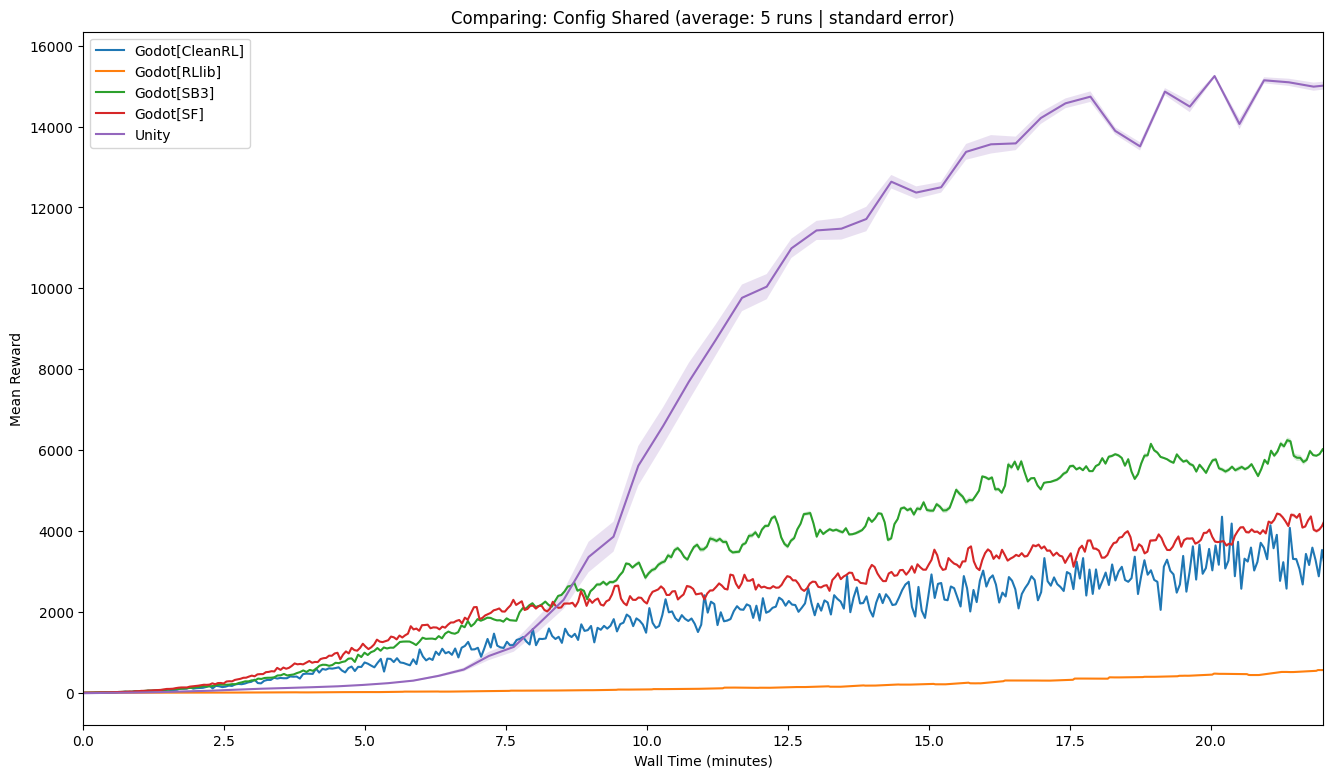

In [3]:
plt.figure(figsize=(16, 9))

# Plot the mean values
plt.plot(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'], label='Godot[CleanRL]')
plt.fill_between(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'] - cleanrl['std_error']['Value'], cleanrl['mean_values']['Value'] + cleanrl['std_error']['Value'], alpha=0.2)
# plt.errorbar(cleanrl['mean_values']['Wall time'] / 60, cleanrl['mean_values']['Value'], yerr=cleanrl['std_error']['Value'], label='Godot[CleanRL]', fmt='o')
plt.plot(rllib['mean_values']['Wall time'] / 60, rllib['mean_values']['Value'], label='Godot[RLlib]')
plt.fill_between(rllib['mean_values']['Wall time'] / 60, rllib['mean_values']['Value'] - rllib['std_error']['Value'], rllib['mean_values']['Value'] + rllib['std_error']['Value'], alpha=0.2)
plt.plot(sb3['mean_values']['Wall time'] / 60, sb3['mean_values']['Value'], label='Godot[SB3]')
plt.fill_between(sb3['mean_values']['Wall time'] / 60, sb3['mean_values']['Value'] - sb3['std_error']['Value'], sb3['mean_values']['Value'] + sb3['std_error']['Value'], alpha=0.2)
plt.plot(sf['mean_values']['Wall time'] / 60, sf['mean_values']['Value'], label='Godot[SF]')
plt.fill_between(sf['mean_values']['Wall time'] / 60, sf['mean_values']['Value'] - sf['std_error']['Value'], sf['mean_values']['Value'] + sf['std_error']['Value'], alpha=0.2)
plt.plot(unity['mean_values']['Wall time'] / 60, unity['mean_values']['Value'], label='Unity')
plt.fill_between(unity['mean_values']['Wall time'] / 60, unity['mean_values']['Value'] - unity['std_error']['Value'], unity['mean_values']['Value'] + unity['std_error']['Value'], alpha=0.2)

# Add labels and title
plt.xlabel("Wall Time (minutes)")
plt.xlim(0, 22)
plt.ylabel("Mean Reward")
plt.title("Comparing: Config Shared (average: 5 runs | standard error)")
plt.legend(loc="upper left")

# Show the plot
plt.show()